In [2]:
from datetime import datetime

import pandas as pd
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')

jobs = pd.read_csv('all_jobs.csv', index_col=0)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yurko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yurko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
jobs

,title,employer,location,rating,description,salary_estimate,easy_apply,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating,company_size,company_type,company_sector,company_founded,company_industry,company_revenue
0,Associate/Consultant - Cybersecurity,Boston Consulting Group,Tel Aviv-Yafo,4.4,Who We Are Boston Consulting Group partners w...,-1,0,4.4,4.5,4.3,4.1,3.1,10000+ Employees,Company - Private,Management & Consulting,1963,Business Consulting,$5 to $10 billion (USD)
1,Junior Software Engineer,Nym Health,Tel Aviv-Yafo,-1.0,"At Nym, we’re passionate about simplifying hea...",-1,1,4.1,4.7,3.0,2.7,4.4,1 to 50 Employees,Company - Private,-1,-1,-1,Unknown / Non-Applicable
2,Zerto - Backend Engineering Intern,Hewlett Packard Enterprise,Herzliya,4.2,Zerto - Backend Engineering Intern This role ...,-1,0,3.8,3.7,4.3,3.8,4.2,10000+ Employees,Company - Public,Information Technology,2015,Information Technology Support Services,Unknown / Non-Applicable
3,Israel InfoSec DevSecOps student,INTEL,Petah Tikva,4.2,Job Description About the Group The Intel Inf...,-1,0,4.0,4.0,4.2,3.7,4.1,-1,Company - Public,Information Technology,-1,Computer Hardware Development,$10+ billion (USD)
4,Front End Engineering Intern,Hewlett Packard Enterprise,Herzliya,4.2,Front End Engineering Intern This role has be...,-1,0,3.8,3.7,4.3,3.8,4.2,10000+ Employees,Company - Public,Information Technology,2015,Information Technology Support Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,Zerto - Backend Engineering Intern,Hewlett Packard Enterprise,Herzliya,4.2,NaN,-1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1,-1,-1
605,Junior Software Developer,Altair,Israel,4.3,Zerto - Backend Engineering Intern This role ...,-1,0,3.8,3.7,4.3,3.8,4.2,10000+ Employees,Company - Public,Information Technology,2015,Information Technology Support Services,Unknown / Non-Applicable
606,Computer Vision and ML R&D Student - Imaging &...,Apple,Herzliya,4.2,NaN,-1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1,-1,-1
607,Junior Software Developer,Altair,Israel,4.3,"Summary Posted: May 18, 2023 Role Number:20048...",-1,0,3.8,4.3,4.2,3.7,3.6,10000+ Employees,Company - Public,Information Technology,1976,Computer Hardware Development,$10+ billion (USD)


In [4]:
# converting columns to numerical values
jobs.title = jobs.title.astype(str)
jobs.description = jobs.description.astype(str)
jobs.rating = jobs.rating.astype(int)
jobs.career_opportunities_rating = jobs.career_opportunities_rating.astype(int)
jobs.comp_and_benefits_rating = jobs.comp_and_benefits_rating.astype(int)
jobs.culture_and_values_rating = jobs.culture_and_values_rating.astype(int)
jobs.senior_management_rating = jobs.senior_management_rating.astype(int)
jobs.company_founded = jobs.company_founded.astype(int)
jobs.easy_apply = jobs.easy_apply.astype(int)


In [5]:
# title to types
all_titles = ' '.join(jobs['title'])
titles = word_tokenize(all_titles)
filtered_titles = [word.lower() for word in titles if word.isalnum()]
# filtered_titles = [word for word in filtered_titles if word not in stopwords.words('english')]
freq_dist = FreqDist(filtered_titles)
freq_dist.most_common(100)

[('engineer', 228),
 ('developer', 177),
 ('software', 147),
 ('junior', 89),
 ('data', 83),
 ('analyst', 63),
 ('student', 60),
 ('backend', 54),
 ('full', 50),
 ('stack', 50),
 ('qa', 48),
 ('בתחום', 42),
 ('intern', 30),
 ('cloud', 28),
 ('בחברת', 27),
 ('לחברת', 25),
 ('python', 24),
 ('scientist', 23),
 ('position', 22),
 ('frontend', 22),
 ('web', 19),
 ('ai', 18),
 ('group', 17),
 ('end', 16),
 ('learning', 15),
 ('r', 15),
 ('d', 15),
 ('front', 14),
 ('bi', 14),
 ('engineering', 13),
 ('senior', 13),
 ('devops', 13),
 ('manual', 13),
 ('support', 13),
 ('automation', 12),
 ('researcher', 12),
 ('platform', 12),
 ('team', 12),
 ('מצליחה', 12),
 ('לחברה', 12),
 ('israel', 11),
 ('and', 11),
 ('development', 11),
 ('imaging', 11),
 ('sensing', 11),
 ('technology', 11),
 ('product', 10),
 ('של', 10),
 ('algorithms', 9),
 ('security', 9),
 ('lead', 9),
 ('הייטק', 9),
 ('for', 8),
 ('fullstack', 8),
 ('ניסיון', 8),
 ('intelligence', 7),
 ('sw', 7),
 ('google', 7),
 ('machine', 7),
 

In [6]:
titles = ['QA', 'Developer', 'Engineer', 'Software Engineer', '(Data) Analyst', 'Data Scientist', 'Student/Intern']

jobs['title'] = jobs.title.apply(lambda x: 'Student/Intern' if 'student' in x.lower() or 'intern' in x.lower() else x)
jobs['title'] = jobs.title.apply(lambda x: 'QA' if 'qa' in x.lower() else x)
jobs['title'] = jobs.title.apply(
    lambda x: 'Data Scientist' if 'data' in x.lower() and ('scientist' in x.lower() or 'science' in x.lower()) else x)
jobs['title'] = jobs.title.apply(lambda x: '(Data) Analyst' if 'analyst' in x.lower() else x)
jobs['title'] = jobs.title.apply(
    lambda x: 'Software Engineer' if 'software' in x.lower() and 'engineer' in x.lower() else x)
jobs['title'] = jobs.title.apply(lambda x: 'Engineer' if 'software' not in x.lower() and 'engineer' in x.lower() else x)
jobs['title'] = jobs.title.apply(lambda x: 'Developer' if 'developer' in x.lower() else x)
jobs['title'] = jobs.title.apply(lambda x: 'Other' if x not in titles else x)


<Axes: xlabel='Job Title', ylabel='Number of Companies'>

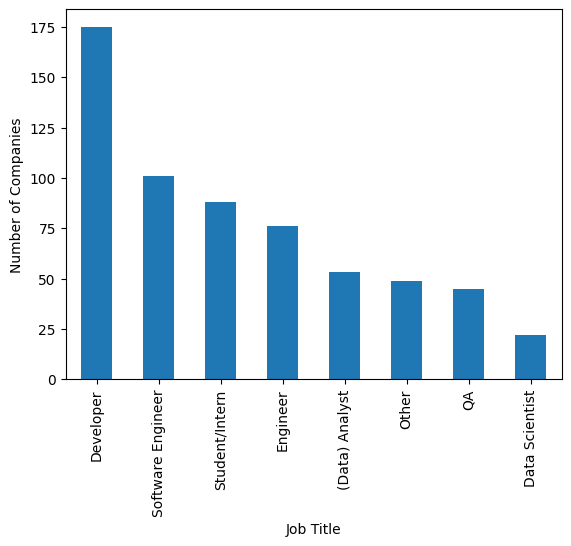

In [19]:
jobs.title.value_counts().plot(kind='bar', xlabel='Job Title', ylabel='Number of Companies')

In [8]:
# drop not useful columns
jobs.drop(['salary_estimate'], inplace=True, axis=1)

<Axes: xlabel='Company Age', ylabel='Number of Companies'>

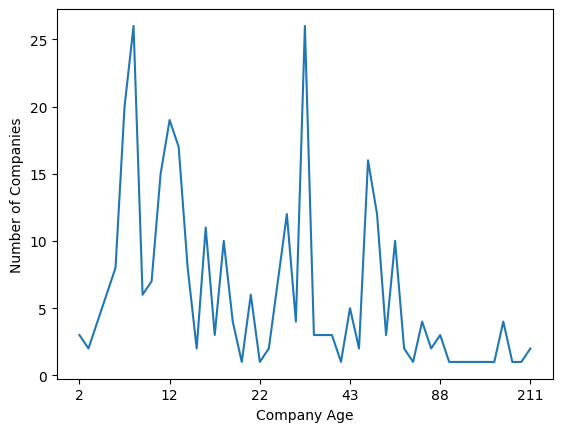

In [9]:
jobs['age'] = jobs.company_founded.apply(lambda x: x if x < 1 else datetime.now().year - x)
pd.Categorical(jobs.age[jobs.age >= 0]).value_counts().plot(kind='line', xlabel='Company Age',
                                                            ylabel='Number of Companies')

<Axes: xlabel='Location', ylabel='Number of Companies'>

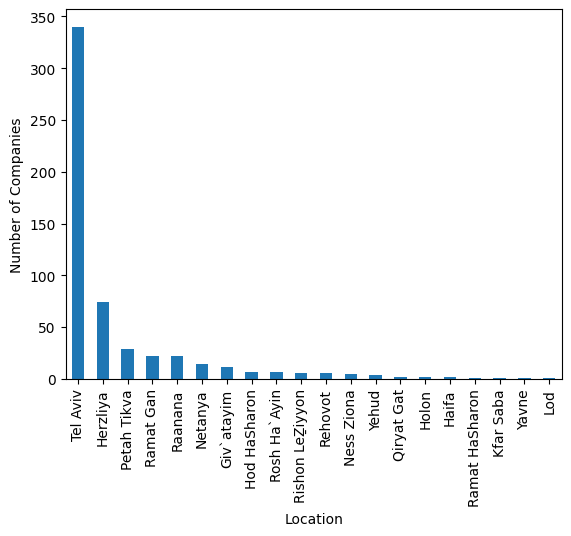

In [10]:
# location to types
jobs['location'] = jobs.location.apply(lambda x: 'Tel Aviv' if x == 'Tel Aviv-Yafo' else x)
jobs.location[~jobs.location.isin(['Central', 'Southern', 'Israel'])].value_counts().plot(kind='bar', xlabel='Location',
                                                                                          ylabel='Number of Companies')

<Axes: xlabel='Location', ylabel="Number post's companies">

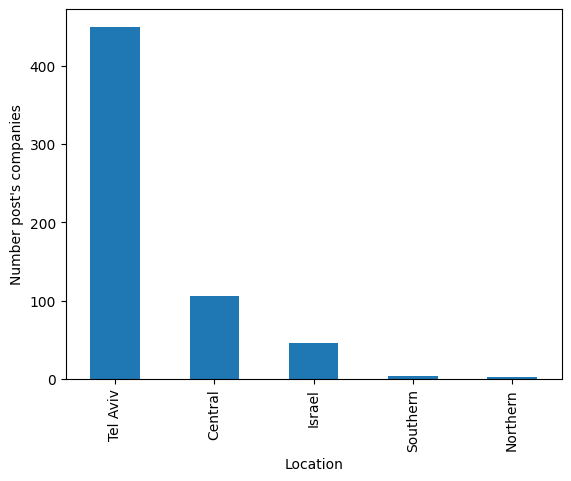

In [11]:

jobs['district'] = jobs.location.apply(lambda
                                           x: 'Tel Aviv' if x == 'Herzliya' or x == 'Ramat Gan' or x == 'Giv`atayim' or x == 'Holon' or x == 'Ramat HaSharon' else x)
jobs['district'] = jobs.district.apply(lambda x: 'Southern' if x == 'Qiryat Gat' else x)
jobs['district'] = jobs.district.apply(lambda
                                           x: 'Central' if x == 'Petah Tikva' or x == 'Raanana' or x == 'Netanya' or x == 'Hod HaSharon' or x == 'Rosh Ha`Ayin' or x == 'Rishon LeẔiyyon' or x == 'Rehovot' or x == 'Ness Ziona' or x == 'Yehud' or x == 'Kfar Saba' or x == 'Yavne' or x == 'Lod' else x)
jobs['district'] = jobs.district.apply(lambda x: 'Northern' if x == 'Haifa' else x)
jobs.district.value_counts().plot(kind='bar', xlabel='Location', ylabel="Number post's companies")

In [14]:
all_text = ' '.join(jobs['description'])
words = word_tokenize(all_text)
words = [word.lower() for word in words if word.isalnum()]
filtered_words = [word for word in words if word not in stopwords.words('english')]
freq_dist = FreqDist(filtered_words)
top_words = freq_dist.most_common(100)

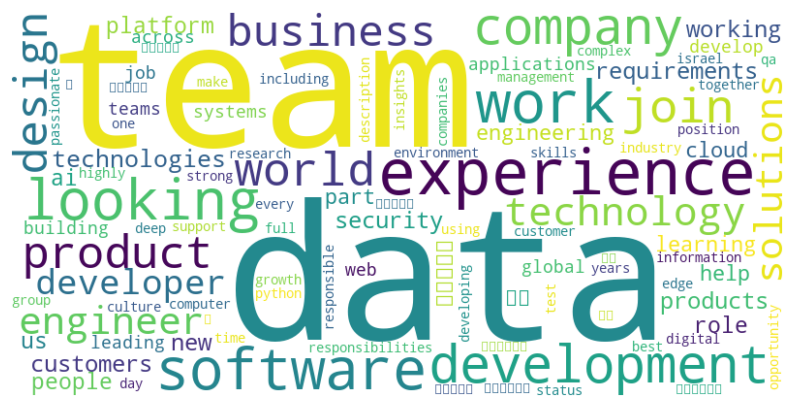

In [15]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Display the WordCloud image using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

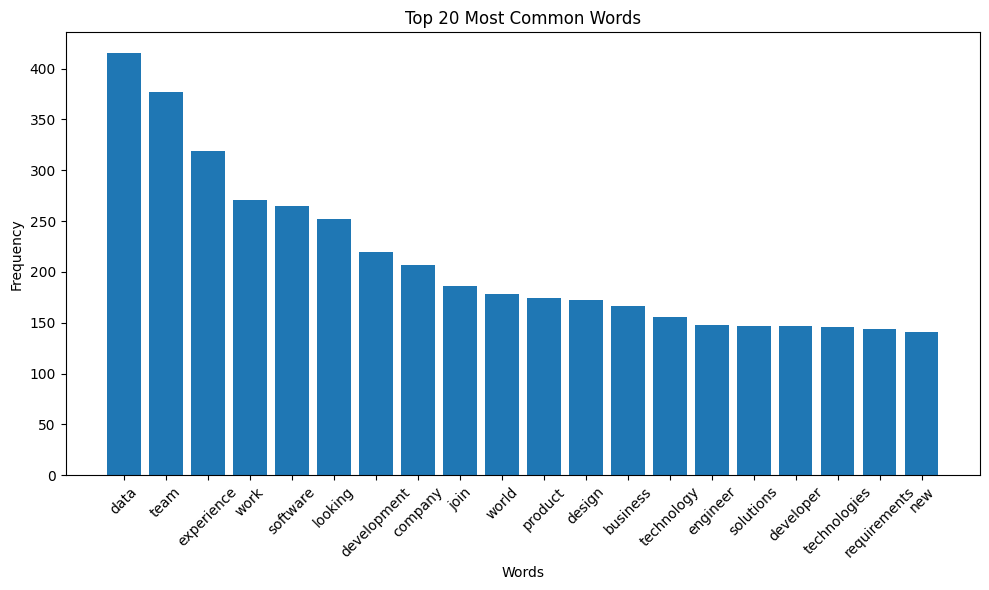

In [32]:
words, counts = zip(*freq_dist.most_common(20))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [13]:
def has_substring(description, substring):
    if isinstance(description, str) and substring in description.lower():
        return 1
    return 0

In [14]:
# description to new columns
jobs['python_keyword'] = jobs.description.apply(lambda x: 1 if 'python' in x.lower() else 0)
jobs['python_keyword'].value_counts()

0    544
1     65
Name: python_keyword, dtype: int64

In [15]:
jobs['ai_keyword'] = jobs.description.apply(lambda x: 1 if 'ai' in x.lower() else 0)
jobs['ai_keyword'].value_counts()

0    340
1    269
Name: ai_keyword, dtype: int64

In [16]:
jobs['java_keyword'] = jobs.description.apply(lambda x: 1 if 'java' in x.lower() else 0)
jobs['java_keyword'].value_counts()

0    573
1     36
Name: java_keyword, dtype: int64

In [17]:
jobs['javascript_keyword'] = jobs.description.apply(lambda x: 1 if 'javascript' in x.lower() else 0)
jobs['javascript_keyword'].value_counts()

0    595
1     14
Name: javascript_keyword, dtype: int64

In [18]:
jobs['c++_keyword'] = jobs.description.apply(lambda x: 1 if 'c++' in x.lower() else 0)
jobs['c++_keyword'].value_counts()

0    593
1     16
Name: c++_keyword, dtype: int64

In [19]:
jobs['react_keyword'] = jobs.description.apply(lambda x: 1 if 'react' in x.lower() else 0)
jobs['react_keyword'].value_counts()

0    573
1     36
Name: react_keyword, dtype: int64

In [20]:
jobs['sql_keyword'] = jobs.description.apply(lambda x: 1 if 'sql' in x.lower() else 0)
jobs['sql_keyword'].value_counts()

0    576
1     33
Name: sql_keyword, dtype: int64

In [21]:
jobs['aws_keyword'] = jobs.description.apply(lambda x: 1 if 'aws' in x.lower() else 0)
jobs['aws_keyword'].value_counts()

0    568
1     41
Name: aws_keyword, dtype: int64

In [22]:
jobs['git_keyword'] = jobs.description.apply(lambda x: 1 if 'git' in x.lower() else 0)
jobs['git_keyword'].value_counts()

0    542
1     67
Name: git_keyword, dtype: int64

In [23]:
# jobs.description.apply(lambda x: 1 if 'hadoop' in x.lower() else 0).value_counts()

<Axes: xlabel='Company Size', ylabel='Number of Posts'>

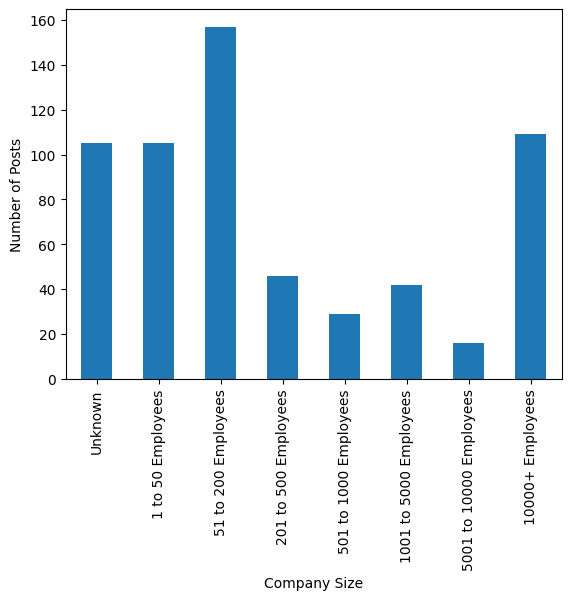

In [24]:
# company size to types
jobs['company_size'] = jobs.company_size.apply(lambda x: 'Unknown' if x == '-1' else x)

order = ['Unknown', '1 to 50 Employees', '51 to 200 Employees', '201 to 500 Employees', '501 to 1000 Employees',
         '1001 to 5000 Employees', '5001 to 10000 Employees', '10000+ Employees']
pd.Categorical(jobs.company_size, categories=order, ordered=True).value_counts().plot(kind='bar', xlabel='Company Size',
                                                                                      ylabel='Number of Posts')

<Axes: xlabel='Company Type', ylabel='Number of Posts'>

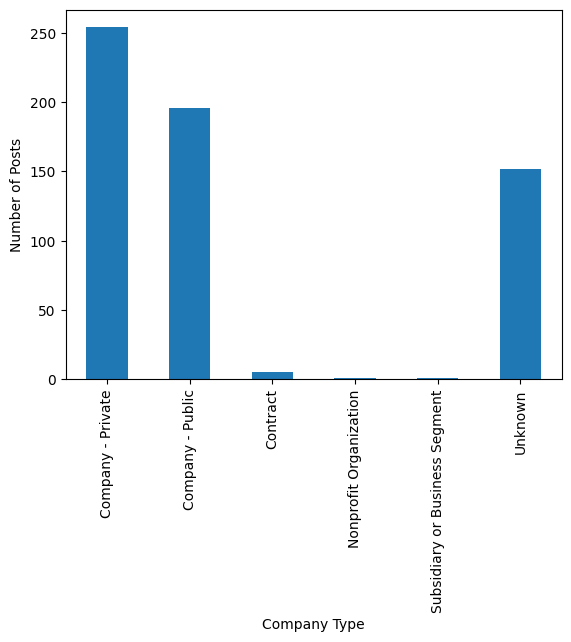

In [25]:
# company type to types
jobs['company_type'] = jobs.company_type.apply(lambda x: 'Unknown' if x == '-1' else x)
pd.Categorical(jobs.company_type).value_counts().plot(kind='bar', xlabel='Company Type', ylabel='Number of Posts')

<Axes: xlabel="Post's Company Sector', ylabel='Number of Companies'">

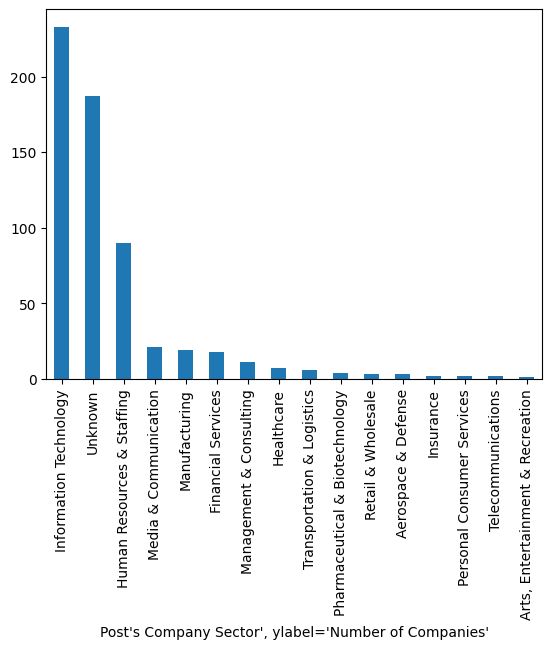

In [26]:
# company sector to types
jobs['company_sector'] = jobs.company_sector.apply(lambda x: 'Unknown' if x == '-1' else x)
jobs.company_sector.value_counts().plot(kind='bar', xlabel="Post's Company Sector', ylabel='Number of Companies'")

<Axes: xlabel="Post's Company Industry", ylabel='Number of Companies'>

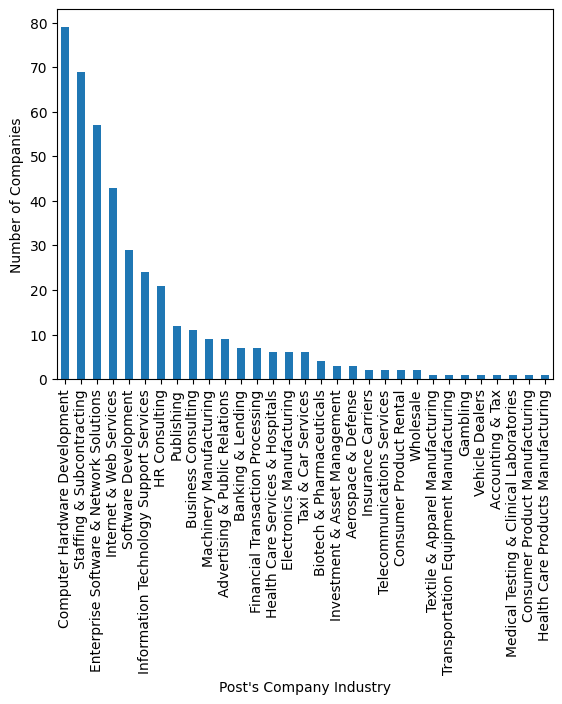

In [27]:
# company industry to types
jobs['company_industry'] = jobs.company_industry.apply(lambda x: 'Unknown' if x == '-1' else x)
# pd.Categorical(jobs.company_industry).value_counts().plot(kind='bar', xlabel='Company Industry', ylabel='Number of Companies')
jobs.company_industry[jobs.company_industry != 'Unknown'].value_counts().plot(kind='bar',
                                                                              xlabel="Post's Company Industry",
                                                                              ylabel='Number of Companies')

<Axes: xlabel="Post's Company Revenue", ylabel='Number of Companies'>

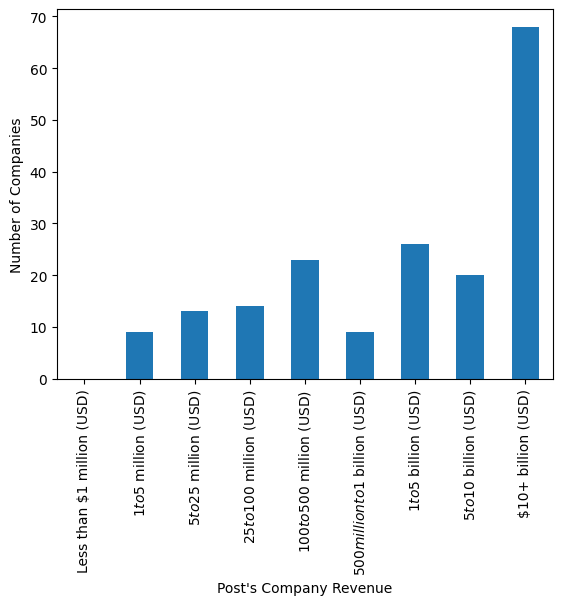

In [28]:
# company revenue to types
jobs['company_revenue'] = jobs.company_revenue.apply(lambda x: 'Unknown / Non-Applicable' if x == '-1' else x)

order = ['Less than $1 million (USD)', '$1 to $5 million (USD)', '$5 to $25 million (USD)',
         '$25 to $100 million (USD)',
         '$100 to $500 million (USD)', '$500 million to $1 billion (USD)', '$1 to $5 billion (USD)',
         '$5 to $10 billion (USD)', '$10+ billion (USD)']
pd.Categorical(jobs.company_revenue, categories=order, ordered=True).value_counts().plot(kind='bar',
                                                                                         xlabel="Post's Company Revenue",
                                                                                         ylabel='Number of Companies')

In [29]:
jobs.drop(['description' ], inplace=True, axis=1)
jobs

,title,employer,location,rating,easy_apply,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating,...,district,python_keyword,ai_keyword,java_keyword,javascript_keyword,c++_keyword,react_keyword,sql_keyword,aws_keyword,git_keyword
0,Other,Boston Consulting Group,Tel Aviv,4,0,4,4,4,4,3.1,...,Tel Aviv,0,0,0,0,0,0,0,0,1
1,Software Engineer,Nym Health,Tel Aviv,-1,1,4,4,3,2,4.4,...,Tel Aviv,0,0,0,0,0,0,0,0,0
2,Student/Intern,Hewlett Packard Enterprise,Herzliya,4,0,3,3,4,3,4.2,...,Tel Aviv,0,0,0,0,0,0,0,0,0
3,Student/Intern,INTEL,Petah Tikva,4,0,4,4,4,3,4.1,...,Central,0,0,0,0,0,0,0,0,0
4,Student/Intern,Hewlett Packard Enterprise,Herzliya,4,0,3,3,4,3,4.2,...,Tel Aviv,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,Student/Intern,Hewlett Packard Enterprise,Herzliya,4,0,-1,-1,-1,-1,-1.0,...,Tel Aviv,0,0,0,0,0,0,0,0,0
605,Developer,Altair,Israel,4,0,3,3,4,3,4.2,...,Israel,0,0,0,0,0,0,0,0,0
606,Student/Intern,Apple,Herzliya,4,0,-1,-1,-1,-1,-1.0,...,Tel Aviv,0,0,0,0,0,0,0,0,0
607,Developer,Altair,Israel,4,0,3,4,4,3,3.6,...,Israel,0,1,0,0,0,0,0,0,0


In [30]:
jobs

,title,employer,location,rating,easy_apply,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating,...,district,python_keyword,ai_keyword,java_keyword,javascript_keyword,c++_keyword,react_keyword,sql_keyword,aws_keyword,git_keyword
0,Other,Boston Consulting Group,Tel Aviv,4,0,4,4,4,4,3.1,...,Tel Aviv,0,0,0,0,0,0,0,0,1
1,Software Engineer,Nym Health,Tel Aviv,-1,1,4,4,3,2,4.4,...,Tel Aviv,0,0,0,0,0,0,0,0,0
2,Student/Intern,Hewlett Packard Enterprise,Herzliya,4,0,3,3,4,3,4.2,...,Tel Aviv,0,0,0,0,0,0,0,0,0
3,Student/Intern,INTEL,Petah Tikva,4,0,4,4,4,3,4.1,...,Central,0,0,0,0,0,0,0,0,0
4,Student/Intern,Hewlett Packard Enterprise,Herzliya,4,0,3,3,4,3,4.2,...,Tel Aviv,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,Student/Intern,Hewlett Packard Enterprise,Herzliya,4,0,-1,-1,-1,-1,-1.0,...,Tel Aviv,0,0,0,0,0,0,0,0,0
605,Developer,Altair,Israel,4,0,3,3,4,3,4.2,...,Israel,0,0,0,0,0,0,0,0,0
606,Student/Intern,Apple,Herzliya,4,0,-1,-1,-1,-1,-1.0,...,Tel Aviv,0,0,0,0,0,0,0,0,0
607,Developer,Altair,Israel,4,0,3,4,4,3,3.6,...,Israel,0,1,0,0,0,0,0,0,0


In [31]:
jobs.to_csv('jobs.csv', index=False)